## Data Exploration


In [5]:
# Import libraries
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [47]:
# Loading data in Memory
country_data = pd.read_csv("data/countries.csv")
gender_data = pd.read_csv("data/age_gender_bkts.csv")

# train data / test data
train_data = pd.read_csv("data/train_users_2.csv")
target = train_data['country_destination']
test_data = pd.read_csv("data/test_users.csv")

In [113]:
# Some useful constants
n_train_data = len(train_data)
n_test_data = len(test_data)
n_train_data

213451

In [50]:
# summary statistics of destination countries in this dataset and their locations
country_data.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [51]:
#  summary statistics of users' age group, gender, country of destination
gender_data.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [52]:
# What is the train data like?
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


Some features may not be useful for predicting the first booking made by a new user

* timestamp_first_active
* date_first_booking
* date_account_created

Also, it is a quick way to see training samples
Some features might need some cleanings
* Age (a lot of them are NaN and wrong values)
* Dates - We'll need to parse them and transform them into some other features (seasons, years, ...)

,country_destination_percent
NDF,58.347349
US,29.222632
other,4.728954
FR,2.353233
IT,1.328174
GB,1.088774
ES,1.053638
CA,0.669006
DE,0.497070
NL,0.356991


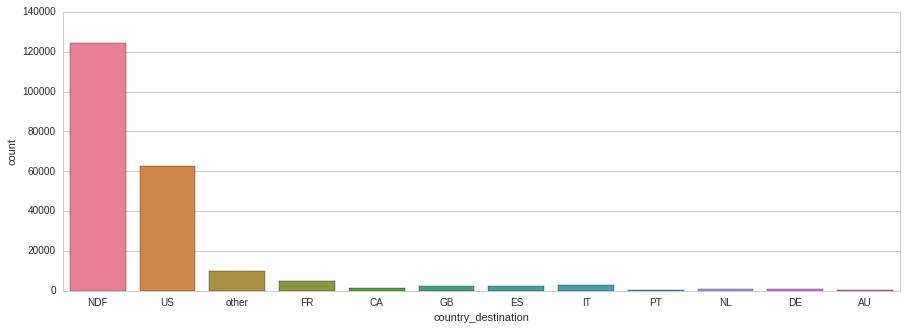

In [107]:
# Let's have a look at the training data
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='country_destination', data=train_data, palette="husl", ax=axis1)

pd.DataFrame({'country_destination_percent' : target.value_counts() * 100 / n_train_data})

The data suggest that

* 58% of the new users do not make any booking.
* 30% book in the US
* 5% are other

It seems that americans tend to prefer traveling in their own country rather than traveling abroad. 

## Age
In this section, I will explore and discuss the age data.

In [62]:
# Age exploration
age = train_data['age'].dropna() # A lot of NaN -> fix it with ML?
real_age = age[(age >= 5) & (age <= 95)] # A lot of outliers
print(real_age.describe())

# % of NaNs
percentage_age_NaN = train_data['age'].isnull().sum() * 100 / real_age.describe()['count']
print("% of NaN entries: {0:.1f}%".format(percentage_age_NaN))

count    123011.000000
mean         36.501142
std          11.585328
min           5.000000
25%          28.000000
50%          34.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64
% of NaN entries: 71.5%


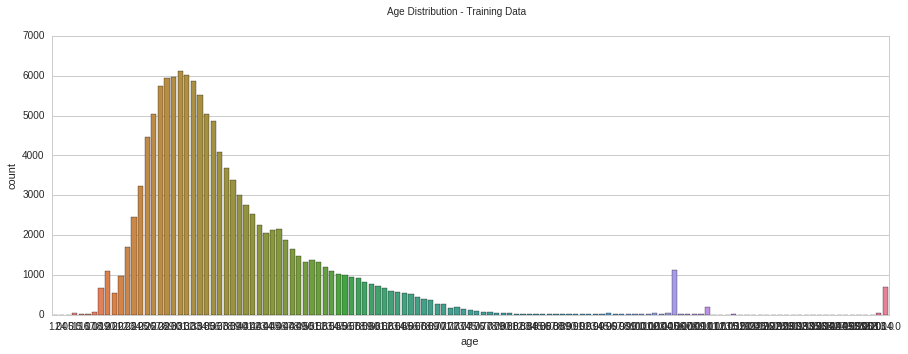

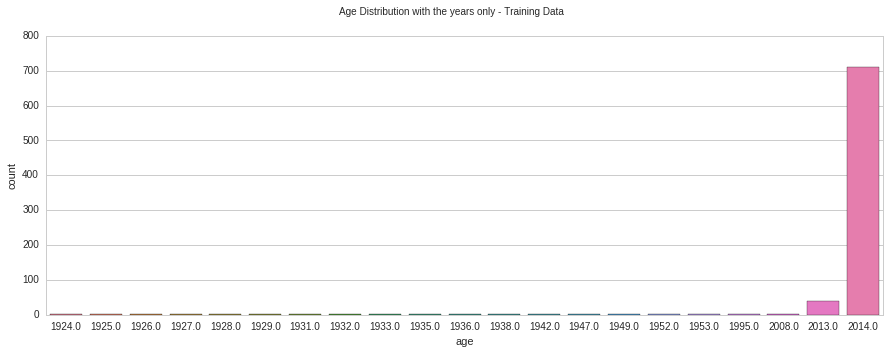

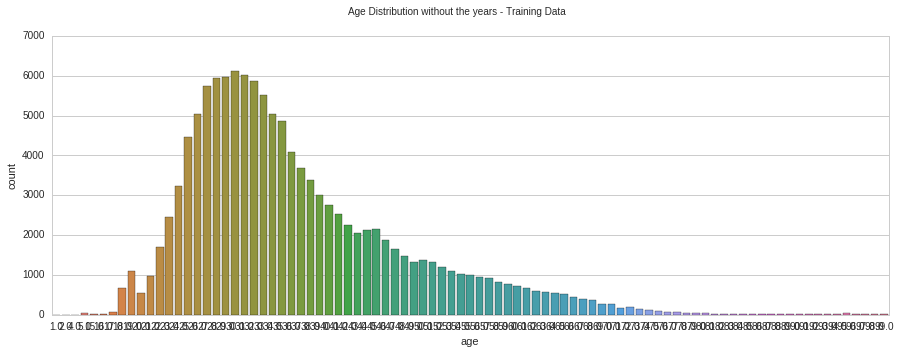

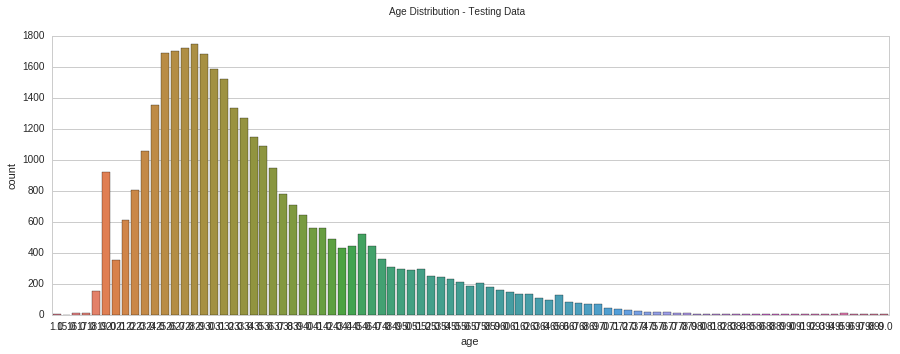

In [65]:
# Exploring the Age Distribution

# Training Data
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
fig.suptitle('Age Distribution - Training Data')
sns.countplot(x='age', data=train_data, palette="husl", ax=axis1)

# Removing the year values
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
fig.suptitle('Age Distribution with the years only - Training Data')
sns.countplot(x='age', data=train_data[train_data['age'] > 300], palette="husl", ax=axis1)

# Removing the year values
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
fig.suptitle('Age Distribution without the years - Training Data')
sns.countplot(x='age', data=train_data[train_data['age'] < 100], palette="husl", ax=axis1)

# Testing Data
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
fig.suptitle('Age Distribution - Testing Data')
sns.countplot(x='age', data=test_data[test_data['age'] < 100], palette="husl", ax=axis1)




I notice that the age data is malformed:
* Sometimes it is an age and sometimes a year date,
* Some values do not make much sense: age <= 5, age >= 95,
* There are a lot of NaN values meaning that these people did not fill out this form input.

Some thoughts on the data
* The age distribution seems close to a **Poisson distribution**,
* Training and testing data follow the same distribution for age. Which is very important for the training and predicting.
* I will need to clean up the data by transforming years

**Cleaning the data**
* Set a valid range (x0, x1) where x0 = 15, x1 = 90
* any values between 1915 and 2000 are birth years
* any age outside the valid range is set to NaN

What is the correlation between users not filling their ages and the destination? Let's have a look.

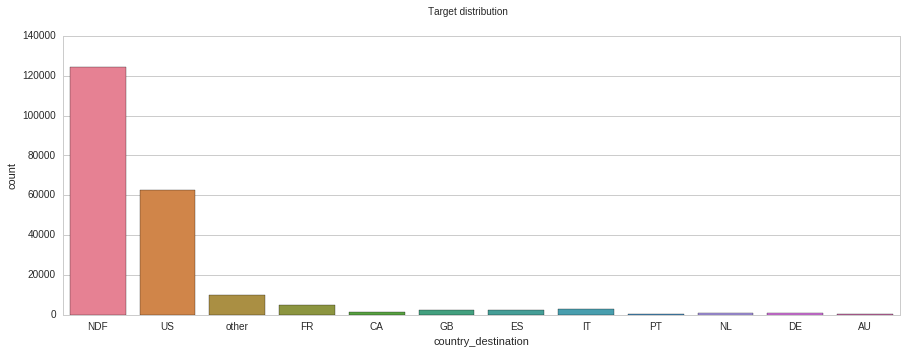

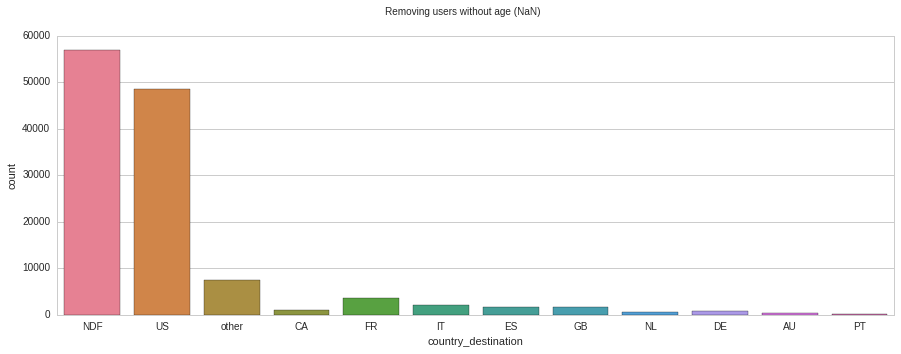

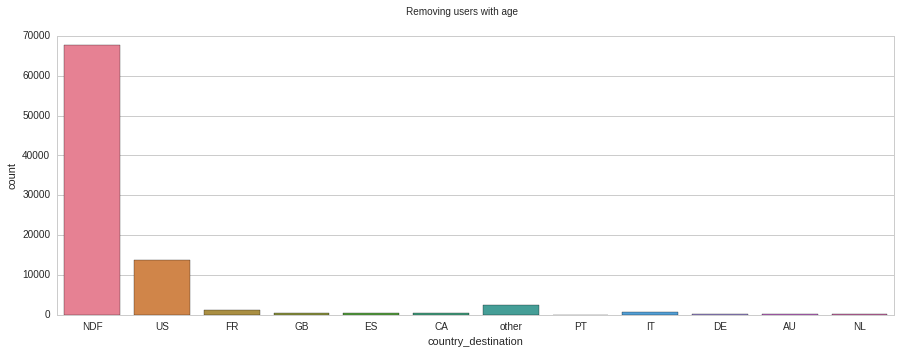

In [111]:
# Without changing the target data
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
fig.suptitle('Target distribution')
sns.countplot(x='country_destination', data=train_data, palette="husl", ax=axis1)

# Removing users without age
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
fig.suptitle('Removing users without age (NaN)')
sns.countplot(x='country_destination', data=train_data[train_data['age'].notnull()], palette="husl", ax=axis1)

# Removing users with age
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
fig.suptitle('Removing users with age')
sns.countplot(x='country_destination', data=train_data[train_data['age'].isnull()], palette="husl", ax=axis1)

From the plots above, the data suggests that only 25% of users with missing ages book while 55% of users with age book a trip.
**NDF** stands for No Destination Found.

## Gender

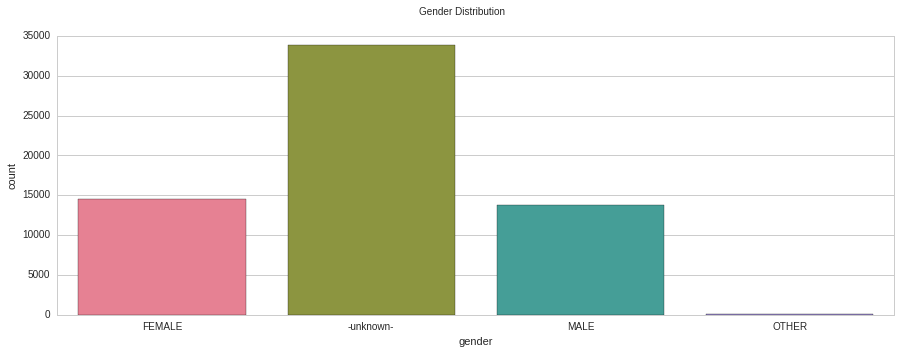

In [78]:
# Gender Exploration
gender = train_data['gender']
gender.value_counts(normalize=True) # How to fix unknown? and OTHER?

fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
fig.suptitle('Gender Distribution')
sns.countplot(x='gender', data=test_data, palette="husl", ax=axis1)

In [45]:
train_data['signup_method'].value_counts(normalize=True)

basic       0.716310
facebook    0.281132
google      0.002558
Name: signup_method, dtype: float64

In [44]:
train_data['first_device_type'].value_counts(normalize=True)

Mac Desktop           0.419768
Windows Desktop       0.340668
iPhone                0.097254
iPad                  0.067177
Other/Unknown         0.049974
Android Phone         0.013132
Android Tablet        0.006053
Desktop (Other)       0.005617
SmartPhone (Other)    0.000356
Name: first_device_type, dtype: float64

In [51]:
train_data['first_browser'].value_counts(normalize=True)

Chrome                  0.299108
Safari                  0.211613
Firefox                 0.157671
-unknown-               0.127739
IE                      0.098702
Mobile Safari           0.090297
Chrome Mobile           0.005950
Android Browser         0.003987
AOL Explorer            0.001148
Opera                   0.000881
Silk                    0.000581
Chromium                0.000342
BlackBerry Browser      0.000248
Maxthon                 0.000216
IE Mobile               0.000169
Apple Mail              0.000169
Sogou Explorer          0.000155
Mobile Firefox          0.000141
SiteKiosk               0.000112
RockMelt                0.000112
Iron                    0.000080
IceWeasel               0.000061
Pale Moon               0.000056
Yandex.Browser          0.000052
SeaMonkey               0.000052
CometBird               0.000052
Camino                  0.000042
TenFourFox              0.000037
wOSBrowser              0.000028
CoolNovo                0.000028
Avant Brow

In [43]:
train_data['signup_app'].value_counts(normalize=True)

Web        0.856014
iOS        0.089102
Moweb      0.029332
Android    0.025552
Name: signup_app, dtype: float64